# Exploratory Data Analysis on Haberman Cancer Survival Data.

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

The file contains 4 attributes.

1.Age of patient at time of operation
2.Operation year of the patient
3.Number of Positive axillary nodes detected.
4.survival status of patient (1=survived 5 years or more,2=died within 5 years)

Our objective is to identify the persons who survived after 5 years of the surgery.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the haberman file for the EDA.
cs_data=pd.read_csv('haberman.csv')
cs_data.columns=['age','Operation_Year','axillary_nodes','survival_status']
cs_data.head()

,age,Operation_Year,axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
print(cs_data.shape)

(305, 4)


There are 305 data points and 4 features in haberman dataset.

In [4]:
print(cs_data.columns)

Index(['age', 'Operation_Year', 'axillary_nodes', 'survival_status'], dtype='object')


In [5]:
#Setting survival_after_5_years to yes or no accordingly.
cs_data['survival_status']=cs_data['survival_status'].apply(lambda x: 'yes' if x == 1 else 'no')

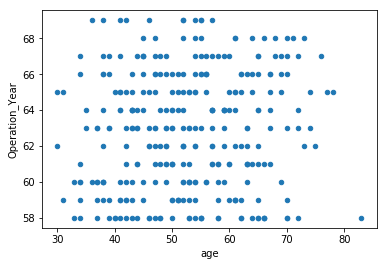

In [6]:
#2D Scatter plot for analysis.

cs_data.plot(kind='scatter',x='age',y='Operation_Year')
plt.show()

The above plot shows the ages of the persons operated during different years.
We can't classify anything based on age and operation year.

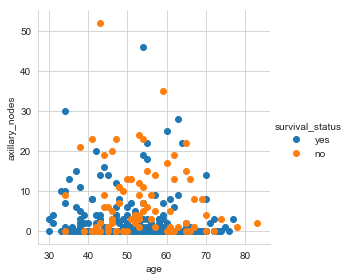

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(cs_data,hue = 'survival_status', height=4) \
    .map(plt.scatter,'age','axillary_nodes') \
    .add_legend()

plt.show()

**Observations.**
1. Using age and axil nodes most of the persons who survived till age 70 are having axillary_nodes <=30. 
2. There are too much overlapping  for the age and axillary_nodes criteria. so, Classification between age and axillary_nodes is not possible.

C:\Users\RohitPatel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


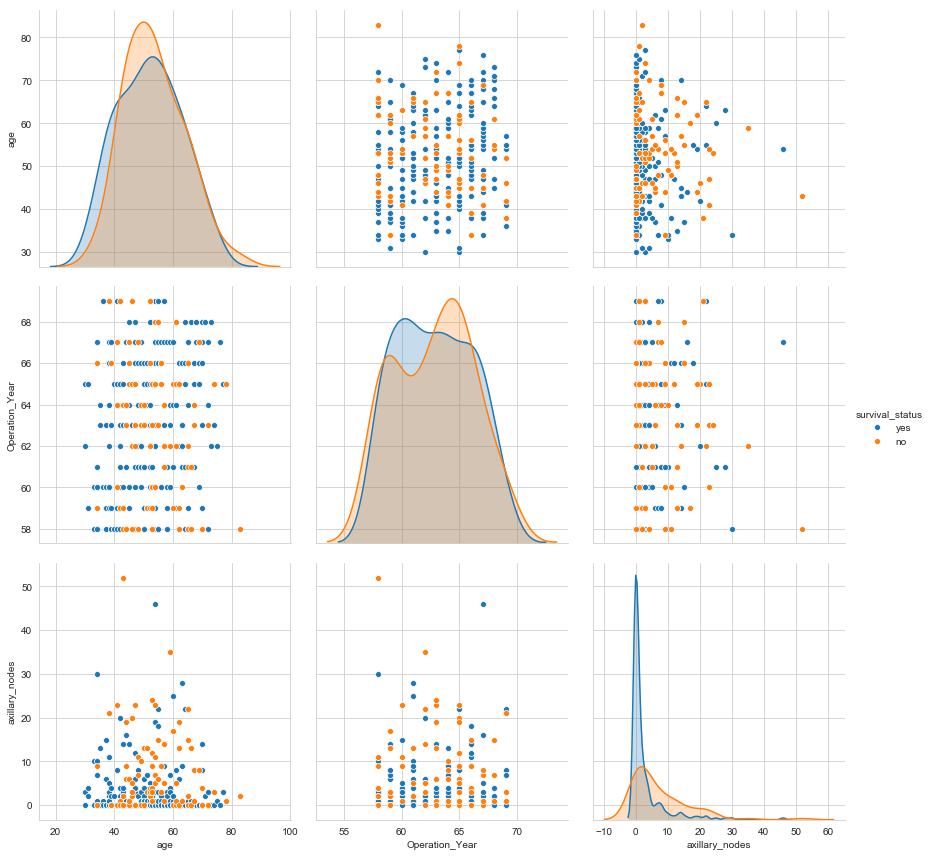

In [21]:
#Creation of pair plot for analysis of different features.
plt.close()
sns.set_style("whitegrid")
sns.pairplot(cs_data,hue='survival_status',height=4)
plt.show()

**Observations.**
1. There are too much overlapping and no conclusion in age and Operation_Year graphs.
2. In axillary_nodes, scatter plots are having too much over lap but the histogram shows the less overlap as compared to others.

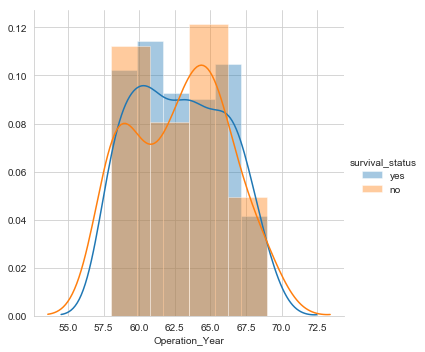

In [9]:
plt.close()
sns.FacetGrid(cs_data, hue="survival_status", height=5) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.show();

**Observations**
1. The operation year is having much overlaping in the plot.
2. Operation year can not be considered for the EDA.

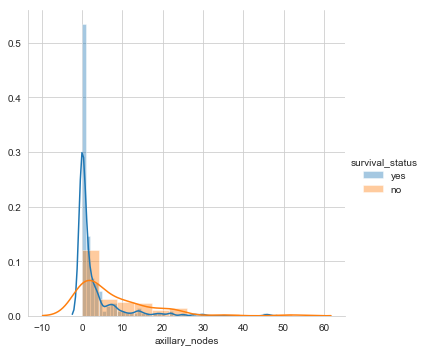

In [10]:
plt.close()
sns.FacetGrid(cs_data,hue='survival_status',height=5) \
    .map(sns.distplot,"axillary_nodes") \
    .add_legend()
plt.show()

**Observations.**
The axillary_nodes have the higher density for the survival rate and less overlapping as compared to age and operation year.

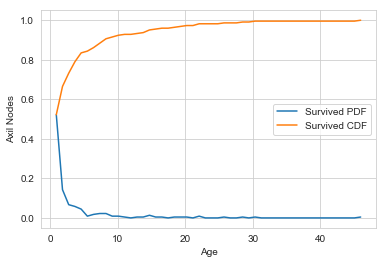

In [11]:
plt.close()
cs_survived = cs_data.loc[cs_data["survival_status"]=='yes']

counts, bin_edges = np.histogram(cs_survived['axillary_nodes'], bins=50, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survived PDF', 'Survived CDF'])
plt.xlabel("Age")
plt.ylabel("Axil Nodes")

plt.show();

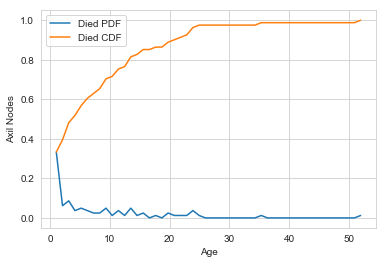

In [12]:
plt.close()
cs_died = cs_data.loc[cs_data["survival_status"]=='no']

counts, bin_edges = np.histogram(cs_died['axillary_nodes'], bins=50, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Died PDF', 'Died CDF'])
plt.xlabel("Age")
plt.ylabel("Axil Nodes")

plt.show();

**Observations**
From PDF and CDF, we can observe that the chances of survival are more where the axillary nodes are less.

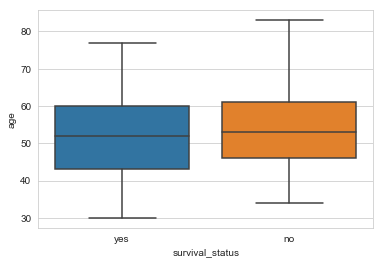

In [13]:
plt.close()
sns.boxplot(data=cs_data,x='survival_status',y='age')
plt.show()

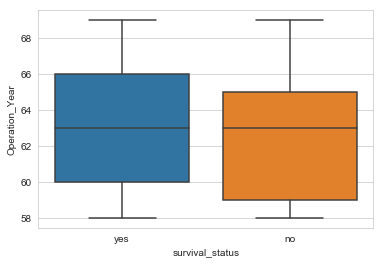

In [14]:
plt.close()
sns.boxplot(data=cs_data,x='survival_status',y='Operation_Year')
plt.show()

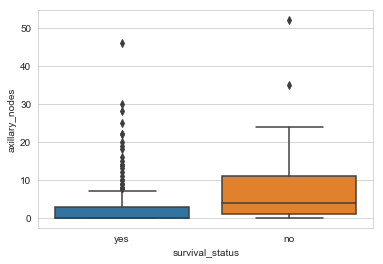

In [15]:
plt.close()
sns.boxplot(data=cs_data,x='survival_status',y='axillary_nodes')
plt.show()

**Observations**
1. In box plots, We can observe that Operation year and age are having more overlapping than axillary nodes.
2. In box plot of axillary node 25th quartile and 50th quartile are overlapped.

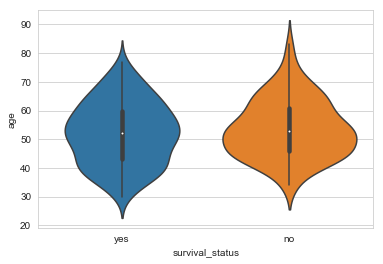

In [16]:
plt.close()
sns.violinplot(data=cs_data,x='survival_status',y='age',size=8)
plt.show()

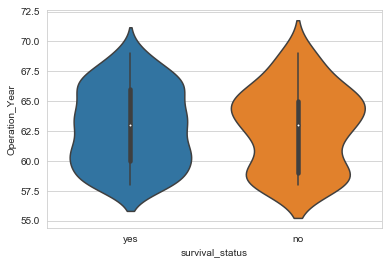

In [17]:
plt.close()
sns.violinplot(data=cs_data,x='survival_status',y='Operation_Year',size=8)
plt.show()

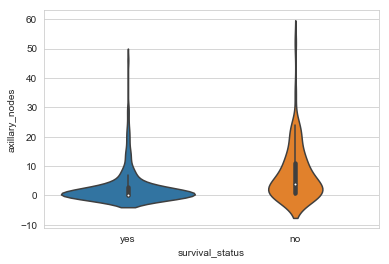

In [18]:
plt.close()
sns.violinplot(data=cs_data,x='survival_status',y='axillary_nodes',size=8)
plt.show()

**Observations**
From the violin plots we can observe that plot density is higher when the axillary nodes are lesser for the survived persons.

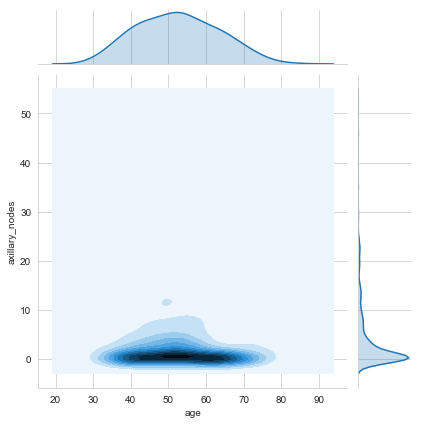

In [19]:
sns.jointplot(x="age", y="axillary_nodes", data=cs_data, kind="kde");
plt.show();

**Conclusion**
1. By EDA on haberman dataset we can conclude that the lesser the axillary nodes then there are more chances of survival after 5 years of the operation.
2. Age and Operation year are having much ovelapping. So, we can't classify survival status based on age and operation year.